In [1]:
%matplotlib inline
# import naming conventions 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# (further reading on mpl imports: http://bit.ly/197aGoq )

## Part 1: data structures

There are two\* main structures in `pandas`: Series (1-dimensional labeled array) and DataFrame (2-dimensional labeled structure).


\* there is also a TimeSeries (a flavor of Series that contains datetimes), Panel (3-dimensional), and Panel4D (4-dimensional). The last two are 'less used,' according to the docs. I haven't experimented with them yet.

### Series (1D)

Series can hold any data type, and the axis label is called an index. Series is dict-like in that you can get and set values by index label. 

In [2]:
m1 = pd.Series([np.nan,4,8,16,24,17,14])
m1

0     NaN
1     4.0
2     8.0
3    16.0
4    24.0
5    17.0
6    14.0
dtype: float64

In [3]:
# by default (without specifying them explicitly), the index label is just an int
m1[6]

14.0

### DataFrame (2D)

Columns can be of different data types. Index and column names are optional. If individual Series have different indexes, the DataFrame index will be the union of the individual ones.

Can create from:

- dict of 1D ndarrays, lists, dicts, or Series

- 2-D numpy.ndarray

- Series

- another DataFrame


N.B.: there are other helper methods for constructing DataFrames from varying data types; [see the docs](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#alternate-constructors) for more options.

In [4]:
# create a couple more Series
m2, m3 = pd.Series(np.random.randn(7)), pd.Series(np.random.randn(7))

In [5]:
# combine multiple Series into a DataFrame with column labels
mydf = pd.DataFrame({'W': m1, 'X': m2, 'Y': m3})

mydf

,W,X,Y
0,NaN,-0.373902,-0.813727
1,4.0,-2.007908,-0.505396
2,8.0,0.140448,1.303552
3,16.0,0.967078,-0.514237
4,24.0,0.468727,-0.056261
5,17.0,0.584735,1.217346
6,14.0,-0.788167,-0.330822


In [6]:
# when Series are different lengths, DataFrame fills in gaps with NaN
m4 = pd.Series(np.random.randn(9))  # whoaaaaaa this Series has extra entries!

my_df = pd.DataFrame({'W': m1, 'X': m2, 'Y': m3, 'Z': m4})

my_df 

,W,X,Y,Z
0,NaN,-0.373902,-0.813727,-0.628135
1,4.0,-2.007908,-0.505396,0.871330
2,8.0,0.140448,1.303552,-0.929540
3,16.0,0.967078,-0.514237,-1.000045
4,24.0,0.468727,-0.056261,-1.611328
5,17.0,0.584735,1.217346,-0.739245
6,14.0,-0.788167,-0.330822,0.389253
7,NaN,NaN,NaN,-1.604193
8,NaN,NaN,NaN,0.154945


In [7]:
# create a DataFrame from numpy array
mydf1 = pd.DataFrame(np.random.randn(8,5))

mydf1             # can only have one 'pretty' output per cell (if it's the last command)

print mydf1       # otherwise, can print arb number of results w/o pretty format
print mydf       # (uncomment both of these print statements)

          0         1         2         3         4
0 -1.979434  0.870614  0.161579  0.595805  1.499160
1  0.145599 -0.025926 -0.982997 -0.843276 -1.104624
2  1.825501  0.243407 -1.354107  0.397349  2.779328
3 -1.803059  1.259042 -1.318908  0.665902 -0.557820
4 -0.386380 -0.510367  0.707177  0.635649  1.009225
5  0.044641  1.750581 -1.281326  0.213657  0.616886
6  0.131723 -0.564916 -2.045519  0.259991  0.344527
7  1.051417 -0.344901 -0.467640 -0.471288  0.282296
      W         X         Y
0   NaN -0.373902 -0.813727
1   4.0 -2.007908 -0.505396
2   8.0  0.140448  1.303552
3  16.0  0.967078 -0.514237
4  24.0  0.468727 -0.056261
5  17.0  0.584735  1.217346
6  14.0 -0.788167 -0.330822


Can inspect your DataFrames with head() and tail() methods - takes a number of lines as an argument. 

Without specifiying them, DataFrames have default index and column name attributes.

In [8]:
# recall current dataframe 
mydf1.head(4)

,0,1,2,3,4
0,-1.979434,0.870614,0.161579,0.595805,1.499160
1,0.145599,-0.025926,-0.982997,-0.843276,-1.104624
2,1.825501,0.243407,-1.354107,0.397349,2.779328
3,-1.803059,1.259042,-1.318908,0.665902,-0.557820


But you can assign to those attributes of the DataFrame...

In [9]:
cs = ['x', 'y', 'z', 'v', 'w']

# assign columns attribute (names) 
mydf1.columns = cs

# create an index:
#  generate a sequence of dates with pandas' data_range() method,
#  then assign the index attribute
dts = pd.date_range(start='2013-05-24 16:14:14', freq='W', periods=8)
mydf1.index = dts

mydf1

,x,y,z,v,w
2013-05-26 16:14:14,-1.979434,0.870614,0.161579,0.595805,1.499160
2013-06-02 16:14:14,0.145599,-0.025926,-0.982997,-0.843276,-1.104624
2013-06-09 16:14:14,1.825501,0.243407,-1.354107,0.397349,2.779328
2013-06-16 16:14:14,-1.803059,1.259042,-1.318908,0.665902,-0.557820
2013-06-23 16:14:14,-0.386380,-0.510367,0.707177,0.635649,1.009225
2013-06-30 16:14:14,0.044641,1.750581,-1.281326,0.213657,0.616886
2013-07-07 16:14:14,0.131723,-0.564916,-2.045519,0.259991,0.344527
2013-07-14 16:14:14,1.051417,-0.344901,-0.467640,-0.471288,0.282296


In [10]:
# an aside: inspecting the dates object...
print 'what is a date_range object?\n\n', dts

what is a date_range object?

DatetimeIndex(['2013-05-26 16:14:14', '2013-06-02 16:14:14',
               '2013-06-09 16:14:14', '2013-06-16 16:14:14',
               '2013-06-23 16:14:14', '2013-06-30 16:14:14',
               '2013-07-07 16:14:14', '2013-07-14 16:14:14'],
              dtype='datetime64[ns]', freq='W-SUN')


Do some indexing / subsetting...

In [11]:
# select a row by index label by using .loc 
mydf1.loc['2013-07-07 16:14:14']

x    0.131723
y   -0.564916
z   -2.045519
v    0.259991
w    0.344527
Name: 2013-07-07 16:14:14, dtype: float64

In [12]:
# select a single element
mydf1.loc['2013-05-26 16:14:14','z']

0.16157885577697387

In [13]:
# new dataframe with random numbers
df_1 = pd.DataFrame(np.random.randn(7,7), index=list('rstlnea'),columns=list('WXYZABC'))

df_1

,W,X,Y,Z,A,B,C
r,0.052040,-1.579228,0.730429,-0.156610,-0.739271,1.047159,2.613013
s,-0.892455,-0.666634,0.145120,-1.374048,-1.135077,-0.534149,-0.564438
t,-0.125459,1.354532,0.284881,-0.491755,-0.956256,-0.361497,0.161712
l,0.262518,0.196135,0.040833,-0.451995,-1.147921,0.740042,-0.615051
n,0.241802,-0.173474,0.587016,0.316506,-1.505252,-0.440143,-1.111473
e,-0.122608,0.024235,-0.788872,0.549005,-0.511097,0.343371,0.069982
a,-0.129802,0.234345,-0.231026,-0.753858,1.203371,-0.672741,-0.922743


In [14]:
# address three separate rows, and a range of three columns
df_1.loc[['l','e','n'],'X':'Z']

,X,Y,Z
l,0.196135,0.040833,-0.451995
e,0.024235,-0.788872,0.549005
n,-0.173474,0.587016,0.316506


## part 2: data

In the `data/` directory is the sample of parsed twitter data that floats around with gnacs. To create the string of column names, I just used the explain option with all other options.

In [15]:
g_x = "id|postedTime|body|NA|['twitter_entiteis:urls:url']|['NA']|['actor:languages_list-items']|gnip:language:value|twitter_lang|[u'geo:coordinates_list-items']|geo:type|NA|NA|NA|NA|actor:utcOffset|NA|NA|NA|NA|NA|NA|NA|NA|NA|actor:displayName|actor:preferredUsername|actor:id|gnip:klout_score|actor:followersCount|actor:friendsCount|actor:listedCount|actor:statusesCount|Tweet|NA|NA|NA"
cnames = g_x.split('|')

In [16]:
# prevent the automatic compression of wide dataframes (add scroll bar)
pd.set_option("display.max_columns", None)

# get some data, inspect
d1 = pd.read_csv('../data/twitter_sample.csv', sep='|', names=cnames)

d1.tail(10)

,id,postedTime,body,NA,['twitter_entiteis:urls:url'],['NA'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,NA.1,NA.2,NA.3,NA.4,actor:utcOffset,NA.5,NA.6,NA.7,NA.8,NA.9,NA.10,NA.11,NA.12,NA.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,NA.14,NA.15,NA.16
85,"tag:search.twitter.com,2005:351835320817426433",2013-07-01T22:50:51.000Z,Como cuando grito ¡¡*José*!! y la mayoria de m...,None,None,None,['es'],en,es,"[14.9673297, -91.7889038]",Point,"['[-94.230569, 14.5319181]', '[-94.230569, 17....",Polygon,"Chiapas, México",MX,-10800,Guatemala,None,None,None,None,None,None,None,None,Pilar Ochoa,PiLigrOsa,107307381,39,280,258,0,2632,Tweet,None,None,None
86,"tag:search.twitter.com,2005:351835321006170112",2013-07-01T22:50:51.000Z,Tweeting for no reason,None,None,None,['en'],en,en,"[47.0353488, -122.7995873]",Point,"['[-122.839691, 46.980616]', '[-122.839691, 47...",Polygon,"Lacey, WA",US,None,None,None,None,None,None,None,None,None,None,aG€Nt ¥£ ¤w,godsgentlegiant,1518643968,41,71,67,0,1474,Tweet,None,None,None
87,"tag:search.twitter.com,2005:351835321056509952",2013-07-01T22:50:51.000Z,And I'm the one that always gets hit on. OKAAAAY.,None,None,None,['en'],en,en,"[34.09956425, -117.40411515]",Point,"['[-117.436711, 34.023746]', '[-117.436711, 34...",Polygon,"Rialto, CA",US,-28800,Arizona-Cali,None,None,None,None,None,None,None,None,Cilli♡,Cilli_021112,382278854,30,557,440,1,18434,Tweet,None,None,None
88,"tag:search.twitter.com,2005:351835320297328640",2013-07-01T22:50:51.000Z,@CheniseFowlisX yeah 😂,None,None,None,['en'],en,vi,"[53.28722009, -3.21569687]",Point,"['[-3.400604, 53.072143999999994]', '[-3.40060...",Polygon,"Flintshire, Flintshire",GB,0,Leeds- UK / Greenfield- Wales,None,None,None,None,None,None,None,None,marshaa,marshaleighm,269323425,44,767,486,0,17549,Reply,http://twitter.com/CheniseFowlisX/statuses/351...,None,None
89,"tag:search.twitter.com,2005:351835321220075524",2013-07-01T22:50:52.000Z,"@justinbagdr no, non mi far star meglio.",None,None,None,['it'],it,it,None,None,"['[14.1332005, 40.7920697]', '[14.1332005, 40....",Polygon,"Napoli, Napoli",IT,None,#bagdr @limitdemibagdr,None,None,None,None,None,None,None,None,demi.,demibagdr,1542203100,44,64,58,0,1872,Reply,http://twitter.com/justinbagdr/statuses/351833...,None,None
90,"tag:search.twitter.com,2005:351835321081659392",2013-07-01T22:50:51.000Z,@xhazzasdimples Probabile AHAHHAHAHAHAHAHAHAHA...,None,None,None,['it'],it,it,"[41.73604, 12.2890263]",Point,"['[12.2344266, 41.6558738]', '[12.2344266, 42....",Polygon,"Roma, Roma",IT,7200,Big Ben's tip,None,None,None,None,None,None,None,None,She's my Louis ❤,xliamsdreams,562092674,53,5084,3802,11,30163,Reply,http://twitter.com/xhazzasdimples/statuses/351...,None,None
91,"tag:search.twitter.com,2005:351835321442385921",2013-07-01T22:50:52.000Z,Mandei a foto do Piqué e o fc n respondeu até ...,None,None,None,['pt'],pt,pt,None,None,"['[-50.899727999999996, -21.454719]', '[-50.89...",Polygon,"Araçatuba, São Paulo",BR,-10800,na cama do mari :p,None,None,None,None,None,None,None,None,lorena uai ∞,Fc_GritaAmor,397609113,44,1248,1962,0,11161,Tweet,None,None,None
92,"tag:search.twitter.com,2005:351835321425608704",2013-07-01T22:50:52.000Z,"O matheus André ta me falando aqui , tem quase...",None,None,None,['pt'],pt,pt,"[-22.72046574, -43.57919689]",Point,"['[-43.645123999999996, -22.783967999999998]',...",Polygon,"Queimados, Rio de Janeiro",BR,-10800,Rio de Janeiro,None,None,None,None,None,None,None,None,Shelyda,ShelydaDays,70959019,40,128,76,0,1419,Tweet,None,None,None
93,"tag:search.twitter.com,2005:351835320859369475",2013-07-01T22:50:51.000Z,@Mulayhim hatha bs one exam. Other exams y6l3o...,None,None,None,['en'],en,en,"[52.21599153, 6.88528201]",Point,"['[6.7559955, 52.1611799]', '[6.7559955, 52.28...",Polygon,Enschede,NL,3600,Netherlands\Enschede,None,None,None,None,N

Since there are so many explain fields that come back with 'None', let's just get rid of them for now. 

(In the future, we might try to find a way to make that field more descriptive, too.)

In [17]:
# n.b.: this is an *in-place* delete -- unusual for a pandas structure
#del d1['NA'] This way didn't work, so I did it below

# The command below is how the docs suggest carrying this out (creating a new df). 
#   But, it doesn't seem to work -- possibly due to multiple cols with same name. Oh well. 
new_d1 = d1.drop([u'NA', u"['NA']", u'NA.1', u'NA.2', u'NA.3',u'NA.4',u'NA.5', u'NA.6', u'NA.7', u'NA.8',\
                  u'NA.9',u'NA.10', u'NA.11', u'NA.12', u'NA.13',u'NA.14', u'NA.15', u'NA.16'], axis=1)  # return new df

In [18]:
# have a peek
new_d1.tail(5)
new_d1.columns

Index([u'id', u'postedTime', u'body', u'['twitter_entiteis:urls:url']',
       u'['actor:languages_list-items']', u'gnip:language:value',
       u'twitter_lang', u'[u'geo:coordinates_list-items']', u'geo:type',
       u'actor:utcOffset', u'actor:displayName', u'actor:preferredUsername',
       u'actor:id', u'gnip:klout_score', u'actor:followersCount',
       u'actor:friendsCount', u'actor:listedCount', u'actor:statusesCount',
       u'Tweet'],
      dtype='object')

## slicing & combining

Subsetting a DataFrame is very similar to the syntax in R. There are two ways to select columns: 'dot' (attribute) notation, and 'square bracket' (index) notation. Sometimes, the column names will dictate which you have to use.

In [19]:
# inspect those rows with twitter-classified lang 'en' (scroll the right to see)
new_d1[new_d1.twitter_lang == 'it'].head()

# the colons in the column name below won't allow dot-access to the column, so we can quote them and still filter.
new_d1[new_d1["gnip:language:value"] == 'it'].head()  

,id,postedTime,body,['twitter_entiteis:urls:url'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,actor:utcOffset,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet
61,"tag:search.twitter.com,2005:351835318850289665",2013-07-01T22:50:51.000Z,Buena noche,None,['es'],it,es,"[37.1793352, -5.7949027]",Point,None,manolo,malooje94,936658410,36,159,160,0,2350,Tweet
79,"tag:search.twitter.com,2005:351835320737730561",2013-07-01T22:50:51.000Z,cite nomes gata..,None,['pt'],it,lv,None,None,-10800,♣,GABRIEL34L3ST,323440706,41,297,237,0,5221,Tweet
89,"tag:search.twitter.com,2005:351835321220075524",2013-07-01T22:50:52.000Z,"@justinbagdr no, non mi far star meglio.",None,['it'],it,it,None,None,None,demi.,demibagdr,1542203100,44,64,58,0,1872,Reply
90,"tag:search.twitter.com,2005:351835321081659392",2013-07-01T22:50:51.000Z,@xhazzasdimples Probabile AHAHHAHAHAHAHAHAHAHA...,None,['it'],it,it,"[41.73604, 12.2890263]",Point,7200,She's my Louis ❤,xliamsdreams,562092674,53,5084,3802,11,30163,Reply


Let's get a subset of this dataframe that has numerical values so we can eventually do some stuff.

In [20]:
# create new dataframe from numerical columns
d2 = new_d1[["gnip:klout_score","actor:followersCount", "actor:friendsCount", "actor:listedCount","actor:statusesCount"]]

d2.head()

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount
0,35,178,129,0,2028
1,32,144,215,0,4071
2,18,37,54,0,3505
3,50,438,174,1,17636
4,21,12,6,0,145


In [21]:
# because I happen to know the answer, let's check data types of the columns...
d2.dtypes  

gnip:klout_score        object
actor:followersCount     int64
actor:friendsCount       int64
actor:listedCount        int64
actor:statusesCount      int64
dtype: object

The `object` type means that the column has multiple types of data in it. This is a good opportunity to 'fix' a section of the DataFrame by way of a function & the `map()` function

In [22]:
# convert ints / strings to floats, give up on anything else (call it 0.0)
def makefloaty(arg):
    if arg == None or arg == 'None':
        return 0.0
    else:
        return float(arg)

In [23]:
# assigning to an existing column overwrites that column 
d2['gnip:klout_score'] = d2['gnip:klout_score'].map(makefloaty)

# check again
d2.dtypes

C:\Users\shann\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


gnip:klout_score        float64
actor:followersCount      int64
actor:friendsCount        int64
actor:listedCount         int64
actor:statusesCount       int64
dtype: object

In [24]:
# use all floats just for fun. 
#  this only works if the elements can all be converted to floats (e.g. ints or something python can handle) 
d2 = d2.astype(float)

d2.dtypes

gnip:klout_score        float64
actor:followersCount    float64
actor:friendsCount      float64
actor:listedCount       float64
actor:statusesCount     float64
dtype: object

Since they're all numbers now, we can do math and also add new columns to the DataFrame. Combining values from separate columns occurs on a row-by-row basis, as expected.

In [25]:
# look at some activity ratios - add col to df
d2['fol/fr'] = d2['gnip:klout_score'] / d2['actor:followersCount']
d2['fr/flw'] = d2['actor:friendsCount'] / d2['actor:followersCount']

d2.head()

# can also use the built-in describe() method to get quick descriptive stats on the dataframe
#d2.describe() -- I did this in a separate line so I could keep the head output pretty....

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,fol/fr,fr/flw
0,35.0,178.0,129.0,0.0,2028.0,0.196629,0.724719
1,32.0,144.0,215.0,0.0,4071.0,0.222222,1.493056
2,18.0,37.0,54.0,0.0,3505.0,0.486486,1.459459
3,50.0,438.0,174.0,1.0,17636.0,0.114155,0.397260
4,21.0,12.0,6.0,0.0,145.0,1.750000,0.500000


In [26]:
d2.describe()

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,fol/fr,fr/flw
count,95.000000,95.000000,95.000000,95.000000,95.000000,94.000000,95.000000
mean,37.842105,1062.747368,442.747368,7.494737,11533.957895,0.224291,inf
std,9.907354,4345.287974,609.239375,50.270306,16738.854139,0.251564,NaN
min,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.002861
25%,33.000000,149.500000,125.500000,0.000000,1884.500000,0.066096,0.700634
50%,39.000000,243.000000,231.000000,0.000000,5221.000000,0.153499,0.927469
75%,43.000000,514.500000,436.500000,1.000000,14648.500000,0.271652,1.476258
max,64.000000,40543.000000,3802.000000,486.000000,105416.000000,1.750000,inf


## grouping

groupby() is used for the split-apply-combine process. I'm led to believe that this is one of the stronger aspects of `pandas`' approach to DataFrames (versus R's), but haven't yet had a chance to really see the power.

In [27]:
# back to bigger df, without 'None' cols
new_d1.head()

,id,postedTime,body,['twitter_entiteis:urls:url'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,actor:utcOffset,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet
0,"tag:search.twitter.com,2005:351835317671690241",2013-07-01T22:50:51.000Z,kavga edelim ama konuşalım,None,['tr'],en,tr,None,None,7200,Rümeysa Özdemir,uykugibisiyok,248312738,35,178,129,0,2028,Tweet
1,"tag:search.twitter.com,2005:351835317604593666",2013-07-01T22:50:51.000Z,@shane_joersz wooooow,None,['en'],en,es,"[47.29088246, -101.0379045]",Point,-21600,cori▲alex.,CoBerg_,48025164,32,144,215,0,4071,Reply
2,"tag:search.twitter.com,2005:351835317747191808",2013-07-01T22:50:51.000Z,お前との肌のふれあいなんぞ求めてない。自重しろ。,None,['ja'],en,ja,"[35.70675048, 139.84273005]",Point,-36000,黒い恋人,yamasyoyamasyo,217987801,18,37,54,0,3505,Tweet
3,"tag:search.twitter.com,2005:351835317608792064",2013-07-01T22:50:51.000Z,@Gabo_navoficial yo tambien creo en ti mi char...,None,['en'],en,es,None,None,-14400,MARIA,maria_e_pena,461188787,50,438,174,1,17636,Reply
4,"tag:search.twitter.com,2005:351835317755592705",2013-07-01T22:50:51.000Z,только ты об этом не знаешь... http://t.co/MOH...,None,['ru'],en,ru,None,None,None,Элька Алб,ElkaAlb,1433828712,21,12,6,0,145,Tweet


Use a groupby to collect all rows by language value, and subsequently use some of the methods available to `GroupBy` DataFrames. Note that the `GroupBy` methods will only act on (and the method call only return) values for columns where numerical calculation makes sense.

In [28]:
# subset df, create new df with only 'popular' accounts -- those matching the filter condition given
trendy_df = new_d1[new_d1["actor:followersCount"] >= 150]

# fix the klout scores again
trendy_df['gnip:klout_score'] = trendy_df['gnip:klout_score'].map(makefloaty)

# in case you need to remind yourself of the dataframe
trendy_df.head()

# use GroupBy methods for stats on each group:
trendy_df.groupby("twitter_lang").size()      # number of elements per group
trendy_df.groupby("twitter_lang").sum()       # sum of elements in each group (obviously doesn't make sense for some cols) 
trendy_df.groupby("twitter_lang").mean()      # algebraic mean of elements per group

C:\Users\shann\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount
twitter_lang,,,,,,
ar,1.438926e+09,40.000000,458.000000,413.000000,0.000000,1061.000000
en,3.350906e+08,39.400000,2019.633333,635.666667,18.966667,18075.966667
es,4.794174e+08,40.076923,1452.769231,458.538462,6.846154,9328.923077
he,1.318589e+09,37.000000,151.000000,284.000000,0.000000,641.000000
id,5.297386e+08,43.250000,387.000000,245.500000,0.000000,8503.500000
it,5.581492e+08,49.500000,3541.500000,2047.500000,19.000000,45199.500000
ja,8.132785e+07,28.000000,152.000000,335.000000,3.000000,2151.000000
ko,1.016681e+09,39.000000,170.000000,120.000000,0.000000,1094.000000
lv,3.234407e+08,41.000000,297.000000,237.000000,0.000000,5221.000000


In [29]:
# though this looks like a normal dataframe, the DataFrameGroupBy object has a heirarchical index
#  this means it may not act as you might expect.
lingo_gb = trendy_df[['twitter_lang',\
             'gnip:klout_score',\
             'actor:followersCount',\
             'actor:friendsCount',\
             'actor:statusesCount']].groupby('twitter_lang')


# note the new index 'twitter_lang' -- in this case, .head(n) returns <= n elements for each index
lingo_gb.head(1)  

# see that they type is DataFrameGroupBy object
lingo_gb

In [30]:
# to get a DataFrame object that responds more like I'm used to, create a new one using the 
#   aggregate method, which results in a single-index DataFrame
lingo_gb_mean = lingo_gb.aggregate(np.mean)  

lingo_gb_mean.head()

# verify the single index
lingo_gb_mean.index

Index([u'ar', u'en', u'es', u'he', u'id', u'it', u'ja', u'ko', u'lv', u'pl',
       u'pt', u'tr', u'und', u'vi'],
      dtype='object', name=u'twitter_lang')

## part 3: plotting

As far as I can tell, plotting in Python was not fun in the past. Below is some easy, base matplotlib, but 'nice' graphics take *a lot* of code. This situation is changing quite quickly now, with the success of `ggplot2` in the R world and the attempts to a) make `matplotlib` look less sucky, and b) implement the Grammar of Graphics in Python.

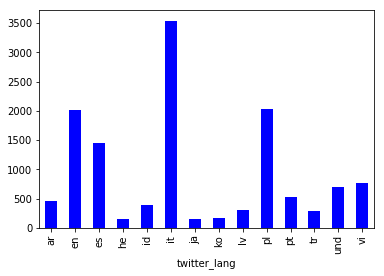

In [31]:
# .plot() is a pandas wrapper for matplotlib's plt.plot() 
lingo_gb_mean['actor:followersCount'].plot(kind='bar', color='b')

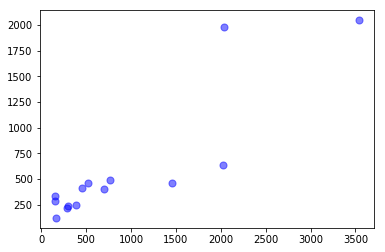

In [32]:
# more base matplotlib 
plt.scatter(x=lingo_gb_mean['actor:followersCount'],\
            y=lingo_gb_mean['actor:friendsCount'],\
            alpha=0.5,\
            s=50,\
            color='blue',\
            marker='o')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B0E4978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000BB498D0>]], dtype=object)

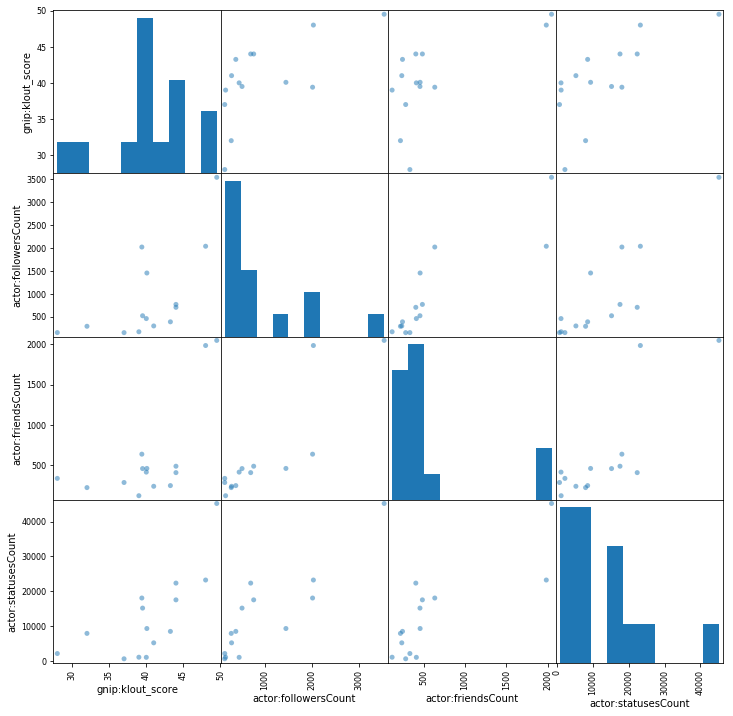

In [33]:
# now read the docs and copypasta a neat-looking plot
from pandas.plotting import scatter_matrix

scatter_matrix(lingo_gb_mean, alpha=0.5, figsize=(12,12), diagonal='hist', s=100)
#I changed the diagonals to histograms...just wanted to see how that worked.


Finally, a short taste of some other plotting libraries. My munging + plotting skillz in this world are still a work in progress, so I will definitely return to this section with an actual use-case in the future. For now, we'll make up some data for illustrative purposes.

In [34]:
# make up some data with large-scale patterns and a datetime index
d3 = pd.DataFrame(np.random.randn(1000, 5), index=pd.date_range('1/1/2010', periods=1000), columns=list('XYZVW'))
d3 = d3.cumsum()
d3.head()

,X,Y,Z,V,W
2010-01-01,0.127366,-0.115791,0.832971,0.273465,2.014597
2010-01-02,-0.783436,-0.314634,0.460076,-1.033012,2.202205
2010-01-03,-1.131692,-0.748642,0.425021,-1.372113,3.487368
2010-01-04,-0.304292,0.076971,0.668625,-1.402017,3.777129
2010-01-05,0.584367,1.551901,1.262157,0.813257,4.462533


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C51E390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C88DF60>]], dtype=object)

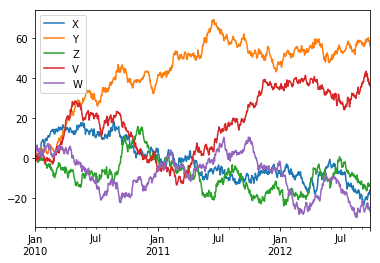

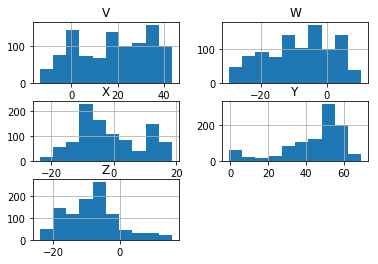

In [35]:
d3.plot()
d3.hist()

Now, let's use some other matplotlib wrappers to get a sense of how we can make this look a little better....

- `prettyplotlib` essentially just fixes a bunch of matplotlib settings behind the scenes so your base methods lead to e.g. ColorBrewer palettes. This essentially overwrites the .matplotlibrc settings for this session with palettes and settings that are slightly nicer. The settings will remain until you start a new session.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D62BA58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D984F98>]], dtype=object)

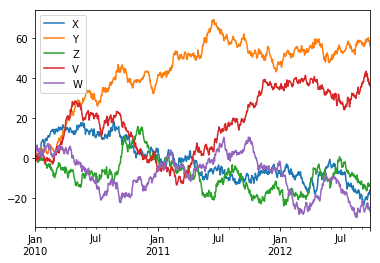

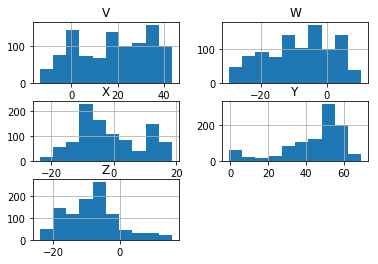

In [36]:
#!pip install prettyplotlib
import prettyplotlib

d3.plot()
d3.hist()

# Visualizing the distribution of a dataset

Shannon's Note: I will keep one graph from each of the sections as per your further clarification...


When dealing with a set of data, often the first thing you'll want to do is get a sense for how the variables are distributed. This chapter of the tutorial will give a brief introduction to some of the tools in seaborn for examining univariate and bivariate distributions. You may also want to look at the :ref:`categorical plots <categorical_tutorial>` chapter for examples of functions that make it easy to compare the distribution of a variable across levels of other variables.

In [37]:
%matplotlib inline

In [38]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [39]:
import seaborn as sns
sns.set(color_codes=True)

In [40]:
np.random.seed(sum(map(ord, "distributions")))

Plotting univariate distributions
---------------------------------

The most convenient way to take a quick look at a univariate distribution in seaborn is the ***`distplot` function. By default, this will draw a `histogram <https://en.wikipedia.org/wiki/Histogram>`_ and fit a `kernel density estimate <https://en.wikipedia.org/wiki/Kernel_density_estimation>`_ (KDE). 

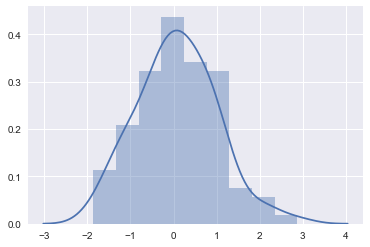

In [41]:
x = np.random.normal(size=100)
sns.distplot(x);

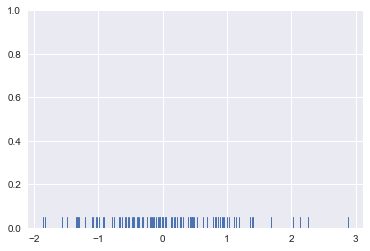

In [42]:
sns.rugplot(x) #decided to try to do a rugplot, it would be good if you're short on space, I guess.

Plotting bivariate distributions
--------------------------------

It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the ***`jointplot` function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

In [43]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

**Hexbin plots**

The bivariate analogue of a histogram is known as a **"hexbin"** plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. It's available through the matplotlib **``plt.hexbin``** function and as a style in **`jointplot`**. It looks best with a white background:

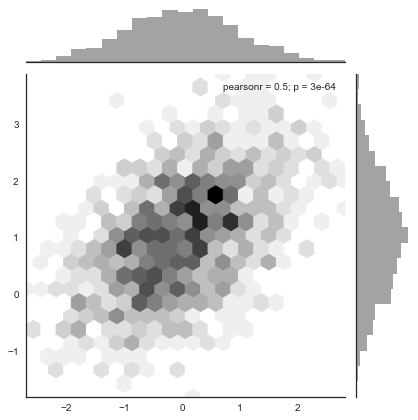

In [44]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

Visualizing pairwise relationships in a dataset
-----------------------------------------------

To plot multiple pairwise bivariate distributions in a dataset, you can use the **`pairplot`** function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. By default, it also draws the univariate distribution of each variable on the diagonal Axes:

In [45]:
iris = sns.load_dataset("iris")

Much like the relationship between **`jointplot`** and **`JointGrid`**, the **`pairplot`** function is built on top of a **`PairGrid`** object, which can be used directly for more flexibility:

C:\Users\shann\Anaconda2\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


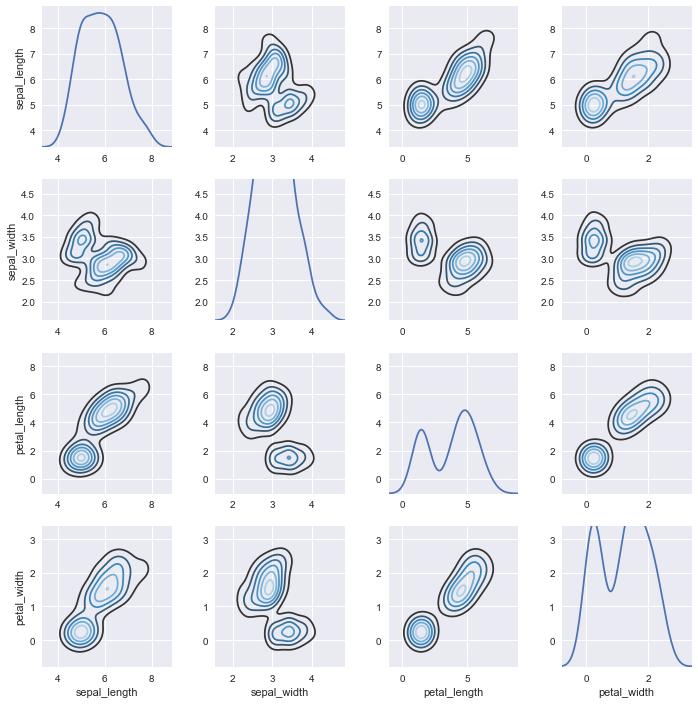

In [46]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

# Visualizing linear relationships

In [47]:
%matplotlib inline

In [48]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [49]:
import seaborn as sns
sns.set(color_codes=True)

In [50]:
np.random.seed(sum(map(ord, "regression")))

In [51]:
tips = sns.load_dataset("tips")

Functions to draw linear regression models
------------------------------------------

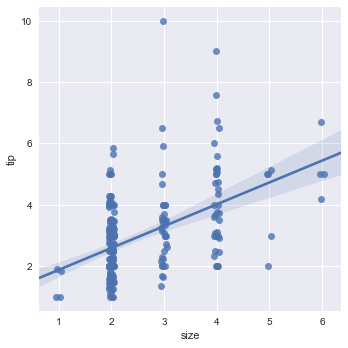

In [52]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

Conditioning on other variables
-------------------------------

The plots above show many ways to explore the relationship between a pair of variables. Often, however, a more interesting question is "how does the relationship between these two variables change as a function of a third variable?" This is where the difference  between **`regplot`** and **`lmplot`** appears. While **`regplot`** always shows a single relationship, **`lmplot`** combines **`regplot`** with **`FacetGrid`** to provide an easy interface to show a linear regression on "faceted" plots that allow you to explore interactions with up to three additional categorical variables.

The best way to separate out a relationship is to plot both levels on the same axes and to use color to distinguish them:

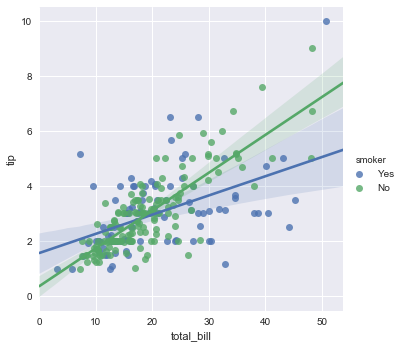

In [53]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

# Plotting with categorical data

We can use scatterplots and regression model fits to visualize the relationship between two variables and how it changes across levels of additional categorical variables. However, what if one of the main variables you are interested in is categorical? In this case, the scatterplot and regression model approach won't work. There are several options, however, for visualizing such a relationship.

It's useful to divide seaborn's categorical plots into three groups: those that show each observation at each level of the categorical variable, those that show an abstract representation of each *distribution* of observations, and those that apply a statistical estimation to show a measure of central tendency and confidence interval. The first includes the functions **swarmplot** and **stripplot**, the second includes **boxplot** and **violinplot**, and the third includes **barplot** and **pointplot**. These functions all share a basic API for how they accept data, although each has specific parameters that control the particulars of the visualization that is applied to that data.

Much like the relationship between **regplot** and **lmplot**, in seaborn there are both relatively low-level and relatively high-level approaches for making categorical plots. The functions named above are all low-level in that they plot onto a specific matplotlib axes. There is also the higher-level **factorplot**, which combines these functions with a **FacetGrid** to apply a categorical plot across a grid of figure panels.


In [54]:
%matplotlib inline

In [55]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [56]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [57]:
np.random.seed(sum(map(ord, "categorical")))

In [58]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

Distributions of observations within categories
-----------------------------------------------

At a certain point, the categorical scatterplot approach becomes limited in the information it can provide about the distribution of values within each category. There are several ways to summarize this information in ways that facilitate easy comparisons across the category levels. These generalize some of the approaches we discussed in the :ref:`chapter <distribution_tutorial>` to the case where we want to quickly compare across several distributions.

Boxplots
^^^^^^^^

The first is the familiar ***`boxplot`. This kind of plot shows the three quartile values of the distribution along with extreme values. The "whiskers" extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. Importantly, this means that each value in the boxplot corresponds to an actual observation in the data:

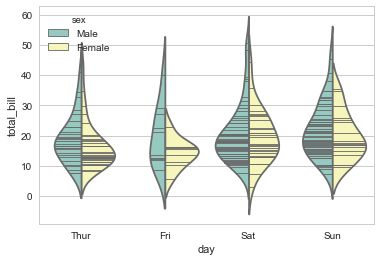

In [59]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,
               split=True, inner="stick", palette="Set3");